<a href="https://colab.research.google.com/github/koushal2001/procurement_timeframe/blob/main/BE_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd


In [79]:
filepath = 'https://github.com/koushal2001/procurement_timeframe/blob/main/dataset.xlsx?raw=true'
# filepath = '/content/drive/MyDrive/studentproject_arde_DATA.xlsx'
df = pd.read_excel(filepath, sheet_name='Sheet1')
df.head()

,SUPPLY_ORDER_NO,SUPPLY_ORDER_DATE,TOTAL_COST,MODE_OF_TENDER_CODE,MODEOFTENDER,PROCUREMENT_MODE_CODE,PROCUREMENT_MODE_DESC,DEMAND_NO,RFP_NO,FINANCIAL_POWER_CODE,...,BUDGET_HEAD_DESCRIPTION_1,PROCUREMENT_MODE_DESC_1,IS_PAC,CONCURRENCE_BY,CONCURRENCE_DATE_1,CONCURRENCE_AMOUNT,CFA,CFA_APPROVAL_REFERENCE,CFA_APPROVAL_DATE,APPROVAL_AMOUNT
0,22SO0001,2021-04-05 16:20:08,119650.23,lp,Through LPC,SO,Supply orders (SO),21CAN114,21SOL310,202001,...,Project Capital,Supply orders (SO),N,NaN,NaN,NaN,Director of Labs/Estt,21CAN114,2021-03-17 11:50:03,119650
1,22GM0001,2021-04-06 00:00:00,209600.00,GM,Procurement Through GeM,GM,Procurement through GeM,21SME033,NaN,202001,...,Project Revenue,Procurement through GeM,N,NaN,NaN,NaN,Director of Labs/Estt,21SME033,2021-04-06 10:32:02,212478
2,22GM0007,2021-04-06 00:00:00,2100.00,GM,Procurement Through GeM,GM,Procurement through GeM,21INT118,NaN,205013,...,Project Revenue,Procurement through GeM,N,NaN,NaN,NaN,Director of Labs/Estt,21INT118,2021-03-30 11:34:47,2200
3,22GM0008,2021-04-06 00:00:00,26800.00,GM,Procurement Through GeM,GM,Procurement through GeM,21PNS048,NaN,205008,...,Project Revenue,Procurement through GeM,N,IFA,2021-01-13 00:00:00,26800.0,Director of Labs/Estt,21PNS048,2021-04-06 15:25:48,26800
4,22GM0002,2021-04-06 00:00:00,7978.00,GM,Procurement Through GeM,GM,Procurement through GeM,21CAA077,NaN,202002,...,General Revenue,Procurement through GeM,N,NaN,NaN,NaN,Director of Labs/Estt,21CAA077,2021-04-06 11:35:47,7978


In [80]:
df.shape

(4152, 48)

In [81]:
cols = df.columns.tolist()
cols

['SUPPLY_ORDER_NO',
 'SUPPLY_ORDER_DATE',
 'TOTAL_COST',
 'MODE_OF_TENDER_CODE',
 'MODEOFTENDER',
 'PROCUREMENT_MODE_CODE',
 'PROCUREMENT_MODE_DESC',
 'DEMAND_NO',
 'RFP_NO',
 'FINANCIAL_POWER_CODE',
 'FINANCIAL_POWER_SERIAL_NO',
 'CFA_CODE',
 'CFA_DESCRIPTION',
 'SANCTION_DATE',
 'CONCURRENCE_LEVEL_CODE',
 'CONCURRED_BY',
 'UO_NO',
 'CONCURRENCE_DATE',
 'GEM_CONTRACT_NO',
 'GEM_CONTRACT_DATE',
 'BUDGET_HEAD_CODE',
 'BUDGET_HEAD_DESCRIPTION',
 'AGAINST_SANCTION_NO',
 'MAJOR_HEAD',
 'SUB_MAJOR_HEAD',
 'MINOR_HEAD',
 'HEAD_CODE',
 'UNITCODE',
 'UNITCODE_DESCRIPTION',
 'RECEIPT_DETAILS',
 'DEMAND_NO_1',
 'DEMAND_DATE',
 'ESTIMATED_COST',
 'DIVISION_NO',
 'DIVISION_NAME',
 'FIN_POWER',
 'FIN_POWER_DEMAND_FS',
 'METHOD_OF_PURCHASE',
 'BUDGET_HEAD_DESCRIPTION_1',
 'PROCUREMENT_MODE_DESC_1',
 'IS_PAC',
 'CONCURRENCE_BY',
 'CONCURRENCE_DATE_1',
 'CONCURRENCE_AMOUNT',
 'CFA',
 'CFA_APPROVAL_REFERENCE',
 'CFA_APPROVAL_DATE',
 'APPROVAL_AMOUNT']

In [82]:
date_cols = ['SUPPLY_ORDER_DATE','DEMAND_DATE']
for col in date_cols:
  df[col] = pd.to_datetime(df[col])

In [83]:
df['TOTAL_DAYS'] = (df['SUPPLY_ORDER_DATE'] - df['DEMAND_DATE']).dt.days
df['TOTAL_DAYS']

0        33
1        39
2        19
3        17
4        13
       ... 
4147    186
4148    139
4149     98
4150    157
4151    160
Name: TOTAL_DAYS, Length: 4152, dtype: int64

In [84]:
df.shape

(4152, 49)

In [85]:
drop_cols = ['SUPPLY_ORDER_DATE', 'SANCTION_DATE', 'CONCURRENCE_DATE', 'GEM_CONTRACT_DATE', 'DEMAND_DATE', 'CONCURRENCE_DATE_1', 'CFA_APPROVAL_DATE']
for i in drop_cols:
  df.drop(i, axis='columns',inplace=True)

In [86]:
df

,SUPPLY_ORDER_NO,TOTAL_COST,MODE_OF_TENDER_CODE,MODEOFTENDER,PROCUREMENT_MODE_CODE,PROCUREMENT_MODE_DESC,DEMAND_NO,RFP_NO,FINANCIAL_POWER_CODE,FINANCIAL_POWER_SERIAL_NO,...,METHOD_OF_PURCHASE,BUDGET_HEAD_DESCRIPTION_1,PROCUREMENT_MODE_DESC_1,IS_PAC,CONCURRENCE_BY,CONCURRENCE_AMOUNT,CFA,CFA_APPROVAL_REFERENCE,APPROVAL_AMOUNT,TOTAL_DAYS
0,22SO0001,119650.23,lp,Through LPC,SO,Supply orders (SO),21CAN114,21SOL310,202001,2.1,...,Through LPC,Project Capital,Supply orders (SO),N,NaN,NaN,Director of Labs/Estt,21CAN114,119650,33
1,22GM0001,209600.00,GM,Procurement Through GeM,GM,Procurement through GeM,21SME033,NaN,202001,2.1,...,Procurement Through GeM,Project Revenue,Procurement through GeM,N,NaN,NaN,Director of Labs/Estt,21SME033,212478,39
2,22GM0007,2100.00,GM,Procurement Through GeM,GM,Procurement through GeM,21INT118,NaN,205013,5.1(a)(iv),...,Procurement Through GeM,Project Revenue,Procurement through GeM,N,NaN,NaN,Director of Labs/Estt,21INT118,2200,19
3,22GM0008,26800.00,GM,Procurement Through GeM,GM,Procurement through GeM,21PNS048,NaN,205008,5.6,...,Procurement Through GeM,Project Revenue,Procurement through GeM,N,IFA,26800.0,Director of Labs/Estt,21PNS048,26800,17
4,22GM0002,7978.00,GM,Procurement Through GeM,GM,Procurement through GeM,21CAA077,NaN,202002,2.2,...,Procurement Through GeM,General Revenue,Procurement through GeM,N,NaN,NaN,Director of Labs/Estt,21CAA077,7978,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,22GM0150,804800.00,GM,Procurement Through GeM,GM,Procurement through GeM,22604069,22GMT116,202002,2.2,...,Procurement Through GeM,General Revenue,Procurement through GeM,N,NaN,NaN,Director of Labs/Estt,22604069,799998,186
4148,22GM0151,82368.00,GM,Procurement Through GeM,GM,Procurement through GeM,22805008,NaN,202002,2.2,...,Procurement Through GeM,General Revenue,Procurement through GeM,N,NaN,NaN,Director of Labs/Estt,22805008,142480,139
4149,22GM0152,494765.74,GM,Procurement Through GeM,GM,Procurement through GeM,22406003,22GMT114,202002,2.2,...,Procurement Through GeM,General Revenue,Procurement through GeM,N,NaN,NaN,Director of Labs/Estt,22406003,497252,98
4150,22GM0153,21888.00,GM,Procurement Through GeM,GM,Procurement through GeM,22GME018,NaN,202001,2.1,...,Procurement Through GeM,Project Capital,Procurement through GeM,N,NaN,NaN,Project Director,22GME018,61999,157


In [87]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder



In [88]:
label_encoder = LabelEncoder()
df.iloc[:,0] = label_encoder.fit_transform(df.iloc[:,0]).astype('float64')



In [89]:
df.dtypes


SUPPLY_ORDER_NO              float64
TOTAL_COST                   float64
MODE_OF_TENDER_CODE           object
MODEOFTENDER                  object
PROCUREMENT_MODE_CODE         object
PROCUREMENT_MODE_DESC         object
DEMAND_NO                     object
RFP_NO                        object
FINANCIAL_POWER_CODE           int64
FINANCIAL_POWER_SERIAL_NO     object
CFA_CODE                      object
CFA_DESCRIPTION               object
CONCURRENCE_LEVEL_CODE        object
CONCURRED_BY                  object
UO_NO                         object
GEM_CONTRACT_NO               object
BUDGET_HEAD_CODE              object
BUDGET_HEAD_DESCRIPTION       object
AGAINST_SANCTION_NO           object
MAJOR_HEAD                    object
SUB_MAJOR_HEAD               float64
MINOR_HEAD                    object
HEAD_CODE                     object
UNITCODE                      object
UNITCODE_DESCRIPTION          object
RECEIPT_DETAILS              float64
DEMAND_NO_1                   object
E

In [90]:
df.columns.tolist()

['SUPPLY_ORDER_NO',
 'TOTAL_COST',
 'MODE_OF_TENDER_CODE',
 'MODEOFTENDER',
 'PROCUREMENT_MODE_CODE',
 'PROCUREMENT_MODE_DESC',
 'DEMAND_NO',
 'RFP_NO',
 'FINANCIAL_POWER_CODE',
 'FINANCIAL_POWER_SERIAL_NO',
 'CFA_CODE',
 'CFA_DESCRIPTION',
 'CONCURRENCE_LEVEL_CODE',
 'CONCURRED_BY',
 'UO_NO',
 'GEM_CONTRACT_NO',
 'BUDGET_HEAD_CODE',
 'BUDGET_HEAD_DESCRIPTION',
 'AGAINST_SANCTION_NO',
 'MAJOR_HEAD',
 'SUB_MAJOR_HEAD',
 'MINOR_HEAD',
 'HEAD_CODE',
 'UNITCODE',
 'UNITCODE_DESCRIPTION',
 'RECEIPT_DETAILS',
 'DEMAND_NO_1',
 'ESTIMATED_COST',
 'DIVISION_NO',
 'DIVISION_NAME',
 'FIN_POWER',
 'FIN_POWER_DEMAND_FS',
 'METHOD_OF_PURCHASE',
 'BUDGET_HEAD_DESCRIPTION_1',
 'PROCUREMENT_MODE_DESC_1',
 'IS_PAC',
 'CONCURRENCE_BY',
 'CONCURRENCE_AMOUNT',
 'CFA',
 'CFA_APPROVAL_REFERENCE',
 'APPROVAL_AMOUNT',
 'TOTAL_DAYS']

In [91]:
object_cols=['SUPPLY_ORDER_NO',
 'MODE_OF_TENDER_CODE',
 'MODEOFTENDER',
 'PROCUREMENT_MODE_CODE',
 'PROCUREMENT_MODE_DESC',
 'DEMAND_NO',
 'RFP_NO',
 'FINANCIAL_POWER_SERIAL_NO',
 'CFA_CODE',
 'CFA_DESCRIPTION',
 'CONCURRENCE_LEVEL_CODE',
 'CONCURRED_BY',
 'UO_NO',
 'GEM_CONTRACT_NO',
 'BUDGET_HEAD_CODE',
 'BUDGET_HEAD_DESCRIPTION',
 'AGAINST_SANCTION_NO',
 'MAJOR_HEAD',
 'MINOR_HEAD',
 'HEAD_CODE',
 'UNITCODE',
 'UNITCODE_DESCRIPTION',
 'DEMAND_NO_1',
 'DIVISION_NO',
 'DIVISION_NAME',
 'FIN_POWER',
 'FIN_POWER_DEMAND_FS',
 'METHOD_OF_PURCHASE',
 'BUDGET_HEAD_DESCRIPTION_1',
 'PROCUREMENT_MODE_DESC_1',
 'IS_PAC',
 'CONCURRENCE_BY',
 'CFA',

 'CFA_APPROVAL_REFERENCE']

label_encoder = LabelEncoder()
for i in object_cols:
  df[i]=df[i].astype(str)

  df[i] = label_encoder.fit_transform(df[i]).astype('float64')

In [92]:
df.dtypes

SUPPLY_ORDER_NO              float64
TOTAL_COST                   float64
MODE_OF_TENDER_CODE          float64
MODEOFTENDER                 float64
PROCUREMENT_MODE_CODE        float64
PROCUREMENT_MODE_DESC        float64
DEMAND_NO                    float64
RFP_NO                       float64
FINANCIAL_POWER_CODE           int64
FINANCIAL_POWER_SERIAL_NO    float64
CFA_CODE                     float64
CFA_DESCRIPTION              float64
CONCURRENCE_LEVEL_CODE       float64
CONCURRED_BY                 float64
UO_NO                        float64
GEM_CONTRACT_NO              float64
BUDGET_HEAD_CODE             float64
BUDGET_HEAD_DESCRIPTION      float64
AGAINST_SANCTION_NO          float64
MAJOR_HEAD                   float64
SUB_MAJOR_HEAD               float64
MINOR_HEAD                   float64
HEAD_CODE                    float64
UNITCODE                     float64
UNITCODE_DESCRIPTION         float64
RECEIPT_DETAILS              float64
DEMAND_NO_1                  float64
E

In [93]:
df

,SUPPLY_ORDER_NO,TOTAL_COST,MODE_OF_TENDER_CODE,MODEOFTENDER,PROCUREMENT_MODE_CODE,PROCUREMENT_MODE_DESC,DEMAND_NO,RFP_NO,FINANCIAL_POWER_CODE,FINANCIAL_POWER_SERIAL_NO,...,METHOD_OF_PURCHASE,BUDGET_HEAD_DESCRIPTION_1,PROCUREMENT_MODE_DESC_1,IS_PAC,CONCURRENCE_BY,CONCURRENCE_AMOUNT,CFA,CFA_APPROVAL_REFERENCE,APPROVAL_AMOUNT,TOTAL_DAYS
0,1285.0,119650.23,8.0,13.0,10.0,17.0,123.0,135.0,202001,0.0,...,13.0,8.0,17.0,0.0,5.0,NaN,1.0,123.0,119650,33
1,658.0,209600.00,2.0,6.0,7.0,11.0,454.0,1372.0,202001,0.0,...,6.0,9.0,11.0,0.0,5.0,NaN,1.0,454.0,212478,39
2,664.0,2100.00,2.0,6.0,7.0,11.0,394.0,1372.0,205013,15.0,...,6.0,9.0,11.0,0.0,5.0,NaN,1.0,394.0,2200,19
3,665.0,26800.00,2.0,6.0,7.0,11.0,433.0,1372.0,205008,25.0,...,6.0,9.0,11.0,0.0,3.0,26800.0,1.0,433.0,26800,17
4,659.0,7978.00,2.0,6.0,7.0,11.0,116.0,1372.0,202002,4.0,...,6.0,3.0,11.0,0.0,5.0,NaN,1.0,116.0,7978,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,822.0,804800.00,2.0,6.0,7.0,11.0,1354.0,557.0,202002,4.0,...,6.0,3.0,11.0,0.0,5.0,NaN,1.0,1354.0,799998,186
4148,824.0,82368.00,2.0,6.0,7.0,11.0,1453.0,1372.0,202002,4.0,...,6.0,3.0,11.0,0.0,5.0,NaN,1.0,1453.0,142480,139
4149,825.0,494765.74,2.0,6.0,7.0,11.0,1276.0,555.0,202002,4.0,...,6.0,3.0,11.0,0.0,5.0,NaN,1.0,1276.0,497252,98
4150,826.0,21888.00,2.0,6.0,7.0,11.0,2995.0,1372.0,202001,0.0,...,6.0,8.0,11.0,0.0,5.0,NaN,4.0,2995.0,61999,157


In [94]:
df.isnull().sum()

SUPPLY_ORDER_NO                 0
TOTAL_COST                      0
MODE_OF_TENDER_CODE             0
MODEOFTENDER                    0
PROCUREMENT_MODE_CODE           0
PROCUREMENT_MODE_DESC           0
DEMAND_NO                       0
RFP_NO                          0
FINANCIAL_POWER_CODE            0
FINANCIAL_POWER_SERIAL_NO       0
CFA_CODE                        0
CFA_DESCRIPTION                 0
CONCURRENCE_LEVEL_CODE          0
CONCURRED_BY                    0
UO_NO                           0
GEM_CONTRACT_NO                 0
BUDGET_HEAD_CODE                0
BUDGET_HEAD_DESCRIPTION         0
AGAINST_SANCTION_NO             0
MAJOR_HEAD                      0
SUB_MAJOR_HEAD               4152
MINOR_HEAD                      0
HEAD_CODE                       0
UNITCODE                        0
UNITCODE_DESCRIPTION            0
RECEIPT_DETAILS              4152
DEMAND_NO_1                     0
ESTIMATED_COST                  0
DIVISION_NO                     0
DIVISION_NAME 

In [95]:
null_cols=['SUB_MAJOR_HEAD','RECEIPT_DETAILS','CONCURRENCE_AMOUNT']
for i in null_cols:
  df.drop(i, axis='columns',inplace=True)

In [96]:
df.shape

(4152, 39)

In [97]:
df.isnull().sum()

SUPPLY_ORDER_NO              0
TOTAL_COST                   0
MODE_OF_TENDER_CODE          0
MODEOFTENDER                 0
PROCUREMENT_MODE_CODE        0
PROCUREMENT_MODE_DESC        0
DEMAND_NO                    0
RFP_NO                       0
FINANCIAL_POWER_CODE         0
FINANCIAL_POWER_SERIAL_NO    0
CFA_CODE                     0
CFA_DESCRIPTION              0
CONCURRENCE_LEVEL_CODE       0
CONCURRED_BY                 0
UO_NO                        0
GEM_CONTRACT_NO              0
BUDGET_HEAD_CODE             0
BUDGET_HEAD_DESCRIPTION      0
AGAINST_SANCTION_NO          0
MAJOR_HEAD                   0
MINOR_HEAD                   0
HEAD_CODE                    0
UNITCODE                     0
UNITCODE_DESCRIPTION         0
DEMAND_NO_1                  0
ESTIMATED_COST               0
DIVISION_NO                  0
DIVISION_NAME                0
FIN_POWER                    0
FIN_POWER_DEMAND_FS          0
METHOD_OF_PURCHASE           0
BUDGET_HEAD_DESCRIPTION_1    0
PROCUREM

In [98]:
corr = df.corr()

<Axes: >

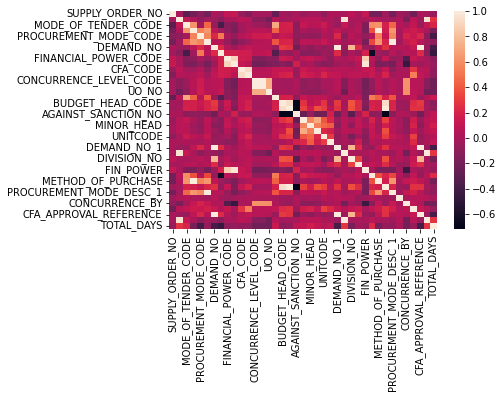

In [99]:
sns.heatmap(corr)

In [100]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [101]:
selected_columns = df.columns[columns]


In [102]:
selected_columns

Index(['SUPPLY_ORDER_NO', 'TOTAL_COST', 'MODE_OF_TENDER_CODE', 'MODEOFTENDER',
       'PROCUREMENT_MODE_CODE', 'PROCUREMENT_MODE_DESC', 'DEMAND_NO', 'RFP_NO',
       'FINANCIAL_POWER_CODE', 'FINANCIAL_POWER_SERIAL_NO', 'CFA_CODE',
       'CONCURRENCE_LEVEL_CODE', 'UO_NO', 'GEM_CONTRACT_NO',
       'BUDGET_HEAD_CODE', 'AGAINST_SANCTION_NO', 'MAJOR_HEAD', 'MINOR_HEAD',
       'HEAD_CODE', 'UNITCODE', 'UNITCODE_DESCRIPTION', 'DIVISION_NO',
       'DIVISION_NAME', 'FIN_POWER_DEMAND_FS', 'IS_PAC', 'CONCURRENCE_BY',
       'CFA', 'TOTAL_DAYS'],
      dtype='object')

In [103]:
data = df[selected_columns]


In [104]:
data.shape

(4152, 28)

In [105]:
data

,SUPPLY_ORDER_NO,TOTAL_COST,MODE_OF_TENDER_CODE,MODEOFTENDER,PROCUREMENT_MODE_CODE,PROCUREMENT_MODE_DESC,DEMAND_NO,RFP_NO,FINANCIAL_POWER_CODE,FINANCIAL_POWER_SERIAL_NO,...,HEAD_CODE,UNITCODE,UNITCODE_DESCRIPTION,DIVISION_NO,DIVISION_NAME,FIN_POWER_DEMAND_FS,IS_PAC,CONCURRENCE_BY,CFA,TOTAL_DAYS
0,1285.0,119650.23,8.0,13.0,10.0,17.0,123.0,135.0,202001,0.0,...,14.0,33.0,47.0,132.0,185.0,22.0,0.0,5.0,1.0,33
1,658.0,209600.00,2.0,6.0,7.0,11.0,454.0,1372.0,202001,0.0,...,5.0,95.0,57.0,272.0,227.0,22.0,0.0,5.0,1.0,39
2,664.0,2100.00,2.0,6.0,7.0,11.0,394.0,1372.0,205013,15.0,...,5.0,8.0,34.0,224.0,150.0,22.0,0.0,5.0,1.0,19
3,665.0,26800.00,2.0,6.0,7.0,11.0,433.0,1372.0,205008,25.0,...,5.0,22.0,63.0,245.0,196.0,22.0,0.0,3.0,1.0,17
4,659.0,7978.00,2.0,6.0,7.0,11.0,116.0,1372.0,202002,4.0,...,11.0,0.0,61.0,130.0,6.0,22.0,0.0,5.0,1.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,822.0,804800.00,2.0,6.0,7.0,11.0,1354.0,557.0,202002,4.0,...,5.0,72.0,69.0,79.0,31.0,22.0,0.0,5.0,1.0,186
4148,824.0,82368.00,2.0,6.0,7.0,11.0,1453.0,1372.0,202002,4.0,...,5.0,72.0,69.0,105.0,257.0,3.0,0.0,5.0,1.0,139
4149,825.0,494765.74,2.0,6.0,7.0,11.0,1276.0,555.0,202002,4.0,...,5.0,72.0,69.0,51.0,215.0,22.0,0.0,5.0,1.0,98
4150,826.0,21888.00,2.0,6.0,7.0,11.0,2995.0,1372.0,202001,0.0,...,14.0,150.0,92.0,205.0,114.0,0.0,0.0,5.0,4.0,157


**Selecting columns based on p-value**

In [106]:
selected_columns=selected_columns[:len(selected_columns)-1]
selected_columns

Index(['SUPPLY_ORDER_NO', 'TOTAL_COST', 'MODE_OF_TENDER_CODE', 'MODEOFTENDER',
       'PROCUREMENT_MODE_CODE', 'PROCUREMENT_MODE_DESC', 'DEMAND_NO', 'RFP_NO',
       'FINANCIAL_POWER_CODE', 'FINANCIAL_POWER_SERIAL_NO', 'CFA_CODE',
       'CONCURRENCE_LEVEL_CODE', 'UO_NO', 'GEM_CONTRACT_NO',
       'BUDGET_HEAD_CODE', 'AGAINST_SANCTION_NO', 'MAJOR_HEAD', 'MINOR_HEAD',
       'HEAD_CODE', 'UNITCODE', 'UNITCODE_DESCRIPTION', 'DIVISION_NO',
       'DIVISION_NAME', 'FIN_POWER_DEMAND_FS', 'IS_PAC', 'CONCURRENCE_BY',
       'CFA'],
      dtype='object')

In [107]:
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [108]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

In [109]:
result = pd.DataFrame()

In [110]:
result = pd.DataFrame(data = data_modeled, columns = selected_columns)


In [111]:
result

,TOTAL_COST,MODEOFTENDER,PROCUREMENT_MODE_CODE,PROCUREMENT_MODE_DESC,DEMAND_NO,RFP_NO,FINANCIAL_POWER_CODE,FINANCIAL_POWER_SERIAL_NO,UO_NO,GEM_CONTRACT_NO,UNITCODE,UNITCODE_DESCRIPTION,DIVISION_NO,DIVISION_NAME,IS_PAC,CONCURRENCE_BY,CFA
0,8.0,10.0,17.0,123.0,135.0,202001.0,0.0,1.0,1866.0,5.0,47.0,132.0,185.0,22.0,5.0,1.0,33.0
1,2.0,7.0,11.0,454.0,1372.0,202001.0,0.0,1.0,899.0,7.0,57.0,272.0,227.0,22.0,5.0,1.0,39.0
2,2.0,7.0,11.0,394.0,1372.0,205013.0,15.0,1.0,268.0,7.0,34.0,224.0,150.0,22.0,5.0,1.0,19.0
3,2.0,7.0,11.0,433.0,1372.0,205008.0,25.0,1.0,1836.0,7.0,63.0,245.0,196.0,22.0,3.0,1.0,17.0
4,2.0,7.0,11.0,116.0,1372.0,202002.0,4.0,1.0,1765.0,2.0,61.0,130.0,6.0,22.0,5.0,1.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,2.0,7.0,11.0,1354.0,557.0,202002.0,4.0,1.0,792.0,2.0,69.0,79.0,31.0,22.0,5.0,1.0,186.0
4148,2.0,7.0,11.0,1453.0,1372.0,202002.0,4.0,1.0,1291.0,2.0,69.0,105.0,257.0,3.0,5.0,1.0,139.0
4149,2.0,7.0,11.0,1276.0,555.0,202002.0,4.0,1.0,1746.0,2.0,69.0,51.0,215.0,22.0,5.0,1.0,98.0
4150,2.0,7.0,11.0,2995.0,1372.0,202001.0,0.0,2.0,1602.0,5.0,92.0,205.0,114.0,0.0,5.0,4.0,157.0


In [112]:
result['TOTAL_DAYS']=data['TOTAL_DAYS']

In [113]:
result

,TOTAL_COST,MODEOFTENDER,PROCUREMENT_MODE_CODE,PROCUREMENT_MODE_DESC,DEMAND_NO,RFP_NO,FINANCIAL_POWER_CODE,FINANCIAL_POWER_SERIAL_NO,UO_NO,GEM_CONTRACT_NO,UNITCODE,UNITCODE_DESCRIPTION,DIVISION_NO,DIVISION_NAME,IS_PAC,CONCURRENCE_BY,CFA,TOTAL_DAYS
0,8.0,10.0,17.0,123.0,135.0,202001.0,0.0,1.0,1866.0,5.0,47.0,132.0,185.0,22.0,5.0,1.0,33.0,33
1,2.0,7.0,11.0,454.0,1372.0,202001.0,0.0,1.0,899.0,7.0,57.0,272.0,227.0,22.0,5.0,1.0,39.0,39
2,2.0,7.0,11.0,394.0,1372.0,205013.0,15.0,1.0,268.0,7.0,34.0,224.0,150.0,22.0,5.0,1.0,19.0,19
3,2.0,7.0,11.0,433.0,1372.0,205008.0,25.0,1.0,1836.0,7.0,63.0,245.0,196.0,22.0,3.0,1.0,17.0,17
4,2.0,7.0,11.0,116.0,1372.0,202002.0,4.0,1.0,1765.0,2.0,61.0,130.0,6.0,22.0,5.0,1.0,13.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,2.0,7.0,11.0,1354.0,557.0,202002.0,4.0,1.0,792.0,2.0,69.0,79.0,31.0,22.0,5.0,1.0,186.0,186
4148,2.0,7.0,11.0,1453.0,1372.0,202002.0,4.0,1.0,1291.0,2.0,69.0,105.0,257.0,3.0,5.0,1.0,139.0,139
4149,2.0,7.0,11.0,1276.0,555.0,202002.0,4.0,1.0,1746.0,2.0,69.0,51.0,215.0,22.0,5.0,1.0,98.0,98
4150,2.0,7.0,11.0,2995.0,1372.0,202001.0,0.0,2.0,1602.0,5.0,92.0,205.0,114.0,0.0,5.0,4.0,157.0,157


In [114]:
def range_encoding(df, source_col_name, dest_col_name, ranges, encoding):
  ranges_result = []
  for val in df[source_col_name]:
    flag = False
    for i in range(len(encoding) - 1):
      if ranges[i][0] <= val <= ranges[i][1]:
        ranges_result.append(encoding[i])
        flag = True
        break
    if not flag:
      ranges_result.append(encoding[len(encoding) - 1])

  df[dest_col_name] = ranges_result
  return df


In [115]:
day_ranges = [(0, 60), (61, 90), (91, 120), (121, 150), (151, 180)]
day_ranges_encoding = ['0 - 60', '60 - 90', '90 - 120', '120 - 150', '150 - 180', '> 180']

data = range_encoding(data, 'TOTAL_DAYS', 'TOTAL_DAYS_RANGES', day_ranges, day_ranges_encoding)

<ipython-input-114-15d56a146dae>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[dest_col_name] = ranges_result


In [116]:
data

,SUPPLY_ORDER_NO,TOTAL_COST,MODE_OF_TENDER_CODE,MODEOFTENDER,PROCUREMENT_MODE_CODE,PROCUREMENT_MODE_DESC,DEMAND_NO,RFP_NO,FINANCIAL_POWER_CODE,FINANCIAL_POWER_SERIAL_NO,...,UNITCODE,UNITCODE_DESCRIPTION,DIVISION_NO,DIVISION_NAME,FIN_POWER_DEMAND_FS,IS_PAC,CONCURRENCE_BY,CFA,TOTAL_DAYS,TOTAL_DAYS_RANGES
0,1285.0,119650.23,8.0,13.0,10.0,17.0,123.0,135.0,202001,0.0,...,33.0,47.0,132.0,185.0,22.0,0.0,5.0,1.0,33,0 - 60
1,658.0,209600.00,2.0,6.0,7.0,11.0,454.0,1372.0,202001,0.0,...,95.0,57.0,272.0,227.0,22.0,0.0,5.0,1.0,39,0 - 60
2,664.0,2100.00,2.0,6.0,7.0,11.0,394.0,1372.0,205013,15.0,...,8.0,34.0,224.0,150.0,22.0,0.0,5.0,1.0,19,0 - 60
3,665.0,26800.00,2.0,6.0,7.0,11.0,433.0,1372.0,205008,25.0,...,22.0,63.0,245.0,196.0,22.0,0.0,3.0,1.0,17,0 - 60
4,659.0,7978.00,2.0,6.0,7.0,11.0,116.0,1372.0,202002,4.0,...,0.0,61.0,130.0,6.0,22.0,0.0,5.0,1.0,13,0 - 60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,822.0,804800.00,2.0,6.0,7.0,11.0,1354.0,557.0,202002,4.0,...,72.0,69.0,79.0,31.0,22.0,0.0,5.0,1.0,186,> 180
4148,824.0,82368.00,2.0,6.0,7.0,11.0,1453.0,1372.0,202002,4.0,...,72.0,69.0,105.0,257.0,3.0,0.0,5.0,1.0,139,120 - 150
4149,825.0,494765.74,2.0,6.0,7.0,11.0,1276.0,555.0,202002,4.0,...,72.0,69.0,51.0,215.0,22.0,0.0,5.0,1.0,98,90 - 120
4150,826.0,21888.00,2.0,6.0,7.0,11.0,2995.0,1372.0,202001,0.0,...,150.0,92.0,205.0,114.0,0.0,0.0,5.0,4.0,157,150 - 180


In [117]:
data.drop('TOTAL_DAYS',axis='columns',inplace=True)

<ipython-input-117-3e40aa890a8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('TOTAL_DAYS',axis='columns',inplace=True)


In [118]:
data

,SUPPLY_ORDER_NO,TOTAL_COST,MODE_OF_TENDER_CODE,MODEOFTENDER,PROCUREMENT_MODE_CODE,PROCUREMENT_MODE_DESC,DEMAND_NO,RFP_NO,FINANCIAL_POWER_CODE,FINANCIAL_POWER_SERIAL_NO,...,HEAD_CODE,UNITCODE,UNITCODE_DESCRIPTION,DIVISION_NO,DIVISION_NAME,FIN_POWER_DEMAND_FS,IS_PAC,CONCURRENCE_BY,CFA,TOTAL_DAYS_RANGES
0,1285.0,119650.23,8.0,13.0,10.0,17.0,123.0,135.0,202001,0.0,...,14.0,33.0,47.0,132.0,185.0,22.0,0.0,5.0,1.0,0 - 60
1,658.0,209600.00,2.0,6.0,7.0,11.0,454.0,1372.0,202001,0.0,...,5.0,95.0,57.0,272.0,227.0,22.0,0.0,5.0,1.0,0 - 60
2,664.0,2100.00,2.0,6.0,7.0,11.0,394.0,1372.0,205013,15.0,...,5.0,8.0,34.0,224.0,150.0,22.0,0.0,5.0,1.0,0 - 60
3,665.0,26800.00,2.0,6.0,7.0,11.0,433.0,1372.0,205008,25.0,...,5.0,22.0,63.0,245.0,196.0,22.0,0.0,3.0,1.0,0 - 60
4,659.0,7978.00,2.0,6.0,7.0,11.0,116.0,1372.0,202002,4.0,...,11.0,0.0,61.0,130.0,6.0,22.0,0.0,5.0,1.0,0 - 60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,822.0,804800.00,2.0,6.0,7.0,11.0,1354.0,557.0,202002,4.0,...,5.0,72.0,69.0,79.0,31.0,22.0,0.0,5.0,1.0,> 180
4148,824.0,82368.00,2.0,6.0,7.0,11.0,1453.0,1372.0,202002,4.0,...,5.0,72.0,69.0,105.0,257.0,3.0,0.0,5.0,1.0,120 - 150
4149,825.0,494765.74,2.0,6.0,7.0,11.0,1276.0,555.0,202002,4.0,...,5.0,72.0,69.0,51.0,215.0,22.0,0.0,5.0,1.0,90 - 120
4150,826.0,21888.00,2.0,6.0,7.0,11.0,2995.0,1372.0,202001,0.0,...,14.0,150.0,92.0,205.0,114.0,0.0,0.0,5.0,4.0,150 - 180


In [119]:
data['TOTAL_DAYS_RANGES'].value_counts()

0 - 60       1703
60 - 90       797
90 - 120      528
> 180         469
120 - 150     397
150 - 180     258
Name: TOTAL_DAYS_RANGES, dtype: int64

In [120]:
data['TOTAL_DAYS_RANGES']=label_encoder.fit_transform(data['TOTAL_DAYS_RANGES']).astype('int64')

<ipython-input-120-78d537a81b99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TOTAL_DAYS_RANGES']=label_encoder.fit_transform(data['TOTAL_DAYS_RANGES']).astype('int64')


In [121]:
data['TOTAL_DAYS_RANGES'].value_counts()

0    1703
3     797
4     528
5     469
1     397
2     258
Name: TOTAL_DAYS_RANGES, dtype: int64

In [122]:
clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [134]:
y_pred = clf.predict(x_test)

In [135]:
from sklearn import metrics
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)) 

ACCURACY OF THE MODEL:  0.741030658838878


In [136]:
from sklearn.metrics import f1_score
score=f1_score(y_test, y_pred, average='macro')
score

0.7398342921218733

In [125]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 4)
imbalanced_y=data["TOTAL_DAYS_RANGES"]
imbalanced_x=data
imbalanced_x=imbalanced_x.drop(["TOTAL_DAYS_RANGES"],axis=1)
balanced_x, balanced_y = sm.fit_resample(imbalanced_x, imbalanced_y.ravel())

In [126]:
np.unique(balanced_y,return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([1703, 1703, 1703, 1703, 1703, 1703]))

In [127]:
x=balanced_x
y=balanced_y

In [128]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,stratify=y)

In [129]:
!sudo pip install xgboost
import xgboost
from xgboost import XGBClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
clf = XGBClassifier(n_estimators=300)

In [131]:
clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [132]:
y_pred = clf.predict(x_test)

In [133]:
from sklearn import metrics
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))  

ACCURACY OF THE MODEL:  0.741030658838878


In [56]:
from sklearn.metrics import f1_score
score=f1_score(y_test, y_pred, average='macro')
score

0.7278217064847929

In [57]:
y_pred = clf.predict(x_train)

In [58]:
from sklearn import metrics
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_train, y_pred))  

ACCURACY OF THE MODEL:  1.0
